In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, accuracy_score


import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump

In [15]:
data = pd.read_csv("Y_25_75.csv")


In [16]:
spectra = data.iloc[:, :-1]
label = data.iloc[:, -1]
print(label)

0       Corn
1       Corn
2       Corn
3       Corn
4       Corn
        ... 
2395     PAO
2396     PAO
2397     PAO
2398     PAO
2399     PAO
Name: Unnamed: 790, Length: 2400, dtype: object


In [17]:
X_train, X_temp, Y_train, Y_temp = train_test_split(spectra, label, test_size = 0.50, random_state = 69, stratify = label)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size = 0.5, random_state = 69, stratify = Y_temp)

In [18]:
randoForest = RandomForestClassifier(n_estimators = 100, random_state = 69)

randoForest.fit(X_train, Y_train)


RandomForestClassifier(random_state=69)

In [19]:
validation_predict = randoForest.predict(X_val)
validation_proba = randoForest.predict_proba(X_val)

label_indices = [list(randoForest.classes_).index(label) for label in validation_predict]
predicted_val_proba = [validation_proba[i, label_idx] for i, label_idx in enumerate(label_indices)]

print(classification_report(Y_val,validation_predict))
print("Accuracy", accuracy_score(Y_val, validation_predict))


              precision    recall  f1-score   support

        Corn       0.96      0.95      0.95       100
     E. coli       0.99      0.93      0.96       100
         FAE       0.98      1.00      0.99       100
        MSSA       0.96      0.98      0.97       100
        Malt       0.92      0.98      0.95       100
         PAO       0.99      0.95      0.97       100

    accuracy                           0.96       600
   macro avg       0.97      0.96      0.97       600
weighted avg       0.97      0.96      0.97       600

Accuracy 0.965


In [20]:
results_df = pd.DataFrame({'Predicted Label': validation_predict, 'Probability of Predicted Label': predicted_val_proba, 'True Label': Y_val})

#results_df.to_excel("RF_Model_Val_Predictions.xlsx", index=False)


In [21]:
test_predict =randoForest.predict(X_test)

print(classification_report(Y_test,test_predict))
print("Accuracy", accuracy_score(Y_test, test_predict))

              precision    recall  f1-score   support

        Corn       0.98      0.98      0.98       100
     E. coli       0.98      0.99      0.99       100
         FAE       0.99      0.98      0.98       100
        MSSA       0.97      1.00      0.99       100
        Malt       0.98      0.97      0.97       100
         PAO       0.99      0.97      0.98       100

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

Accuracy 0.9816666666666667


In [22]:
print("Label Distribution in training set:")
print(Y_train.value_counts())

print("\nLabel distribution in testing set:")
print(Y_test.value_counts())

Label Distribution in training set:
Unnamed: 790
MSSA       200
Malt       200
E. coli    200
PAO        200
Corn       200
FAE        200
Name: count, dtype: int64

Label distribution in testing set:
Unnamed: 790
PAO        100
Malt       100
E. coli    100
FAE        100
Corn       100
MSSA       100
Name: count, dtype: int64


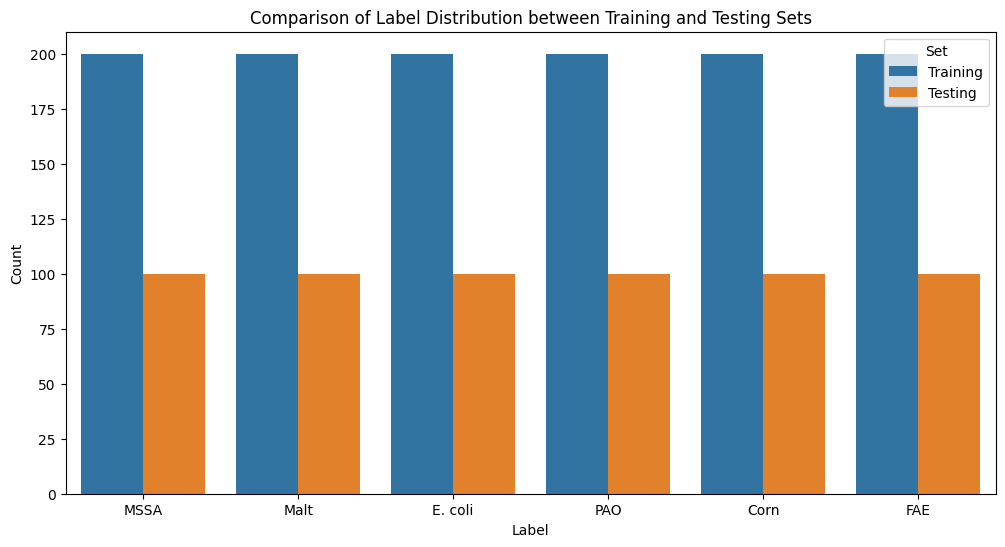

In [23]:
train_labels_df = pd.DataFrame(Y_train.value_counts()).reset_index()
train_labels_df.columns = ['Label', 'Count']
train_labels_df['Set'] = 'Training'

test_labels_df = pd.DataFrame(Y_test.value_counts()).reset_index()
test_labels_df.columns = ['Label', 'Count']
test_labels_df['Set'] = 'Testing'

combined_df = pd.concat([train_labels_df, test_labels_df])

plt.figure(figsize=(12, 6))
sns.barplot(x='Label', y='Count', hue='Set', data=combined_df)
plt.title('Comparison of Label Distribution between Training and Testing Sets')
plt.show()

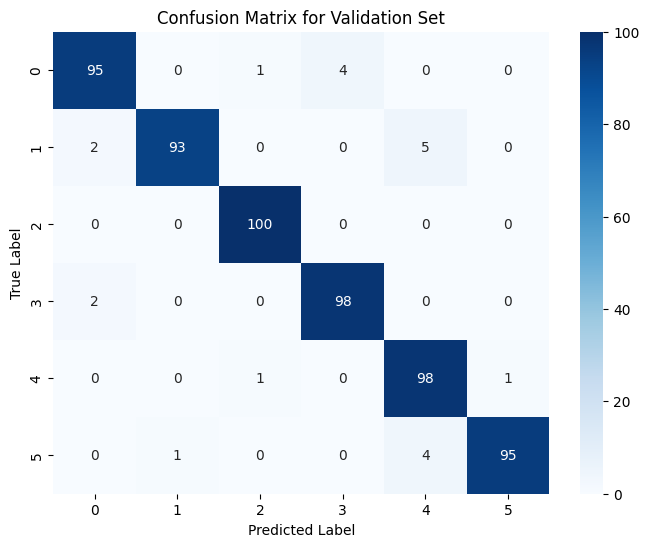

In [24]:
true_labels = results_df["True Label"]
predicted_labels = results_df['Predicted Label']

confusionMatrix = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8,6))

sns.heatmap(confusionMatrix, annot= True, fmt ="d", cmap="Blues")

plt.title('Confusion Matrix for Validation Set')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [25]:
unique_labels = np.unique(np.concatenate((true_labels, predicted_labels)))
print("Order of labels in the confusion matrix:", unique_labels)

Order of labels in the confusion matrix: ['Corn' 'E. coli' 'FAE' 'MSSA' 'Malt' 'PAO']
